# Aufgabe 2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_camping = pd.read_csv("Daten/cleaned_data/Gastro_Filter_v2.csv")
df_weather = pd.read_csv("Daten/test/377_produkt_klima_monat.csv")
print(len(df_camping))
df_camping = df_camping[df_camping['Gastro_Description'] == 'Campingplätze']
print(len(df_camping))

3971
361


In [10]:
df_camping['Datum'] = pd.to_datetime(df_camping['Datum'])
df_camping.set_index('Datum', inplace=True)
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])
df_weather.set_index('Datum', inplace=True)

In [11]:
display(df_camping, df_weather)

,Gastro_Id,Gastro_Description,Umsatz in millionen
Datum,,,
1994-01-01,WZ08-553,Campingplätze,68.4
1994-02-01,WZ08-553,Campingplätze,52.2
1994-03-01,WZ08-553,Campingplätze,81.8
1994-04-01,WZ08-553,Campingplätze,119.4
1994-05-01,WZ08-553,Campingplätze,99.7
...,...,...,...
2023-09-01,WZ08-553,Campingplätze,146.8
2023-10-01,WZ08-553,Campingplätze,96.1
2023-11-01,WZ08-553,Campingplätze,45.3


,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
Datum,,,,,,,,,,,,,,
1947-01-01,NaN,NaN,1.187097,2.225806,2.600000,1.000000,4.548387,4.703226,NaN,-2.503226,82.903226,0.590323,-5.822581,NaN
1947-02-01,NaN,NaN,1.689286,3.392857,2.239286,1.357143,5.971429,4.100000,NaN,-3.050000,81.964286,-0.664286,-6.250000,NaN
1947-03-01,NaN,NaN,4.006452,1.322581,3.409677,0.193548,5.654839,7.203226,NaN,5.425806,76.870968,9.941935,1.474194,NaN
1947-04-01,NaN,NaN,2.006667,0.600000,7.083333,0.000000,4.060000,8.596667,NaN,11.480000,64.533333,17.396667,6.266667,NaN
1947-05-01,NaN,NaN,1.367742,0.483871,2.932258,0.000000,4.529032,12.264516,NaN,15.925806,69.193548,21.129032,10.577419,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,NaN,NaN,3.087097,1.935484,6.295097,NaN,NaN,17.248387,NaN,20.400000,71.875806,25.051613,16.200000,14.761290
2023-09-01,NaN,NaN,0.676667,0.800000,8.753333,NaN,NaN,15.263333,NaN,19.696667,67.385000,25.646667,14.236667,12.150000
2023-10-01,NaN,NaN,4.061290,2.193548,4.076323,0.000000,NaN,11.832258,NaN,13.932258,75.099677,18.409677,9.358065,7.503226


In [12]:
correlation_matrix = df_weather.corrwith(df_camping["Umsatz in millionen"])

In [13]:
sorted_correlations = correlation_matrix.sort_values(ascending=False)
print(sorted_correlations)

 TXK       0.718779
 TMK       0.717641
 TNK       0.699186
 TGK       0.693464
 SDK       0.664721
 VPM       0.628576
 RSK      -0.127539
SHK_TAG   -0.145796
RSKF      -0.257166
  NM      -0.349287
 UPM      -0.659595
  FX            NaN
  FM            NaN
  PM            NaN
dtype: float64


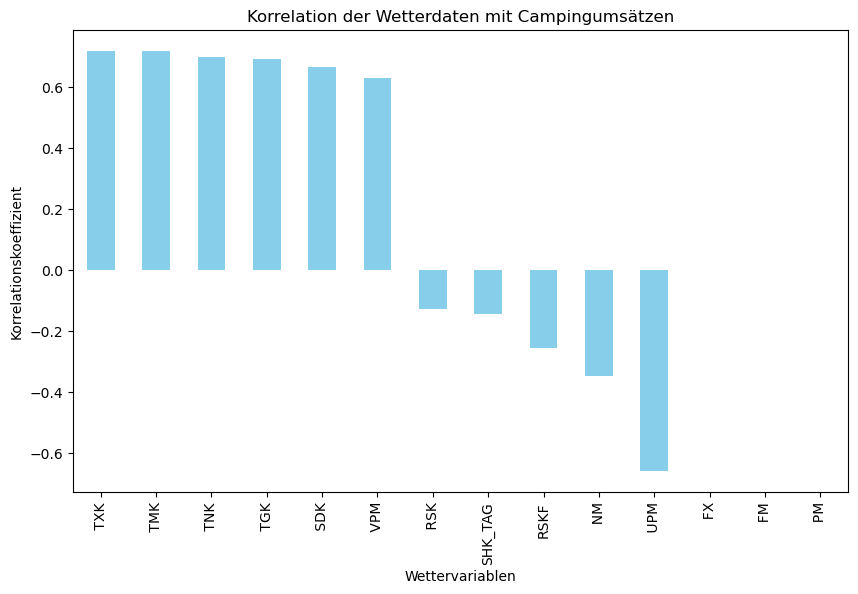

In [14]:
# Plot der sortierten Korrelationen
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar', color='skyblue')
plt.title('Korrelation der Wetterdaten mit Campingumsätzen')
plt.xlabel('Wettervariablen')
plt.ylabel('Korrelationskoeffizient')
plt.show()